<h1>Proyecto 1</h1>

In [101]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score as AS
from sklearn.metrics import f1_score as F1
from sklearn.metrics import precision_score as PS
from sklearn.metrics import recall_score as RS
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, make_scorer
from sklearn.neural_network import MLPClassifier
import pickle as pkl

In [102]:
ruta = "./data/SuicidiosProyecto.csv"
df = pd.read_csv(ruta, encoding="utf-8", index_col=0)
df.columns

Index(['text', 'class'], dtype='object')

In [103]:
df.sample(5)

,text,class
Unnamed: 0,,
196982,"What do I do It's one am, I need my math summa...",non-suicide
270880,FUCK LIFEJUST FUCK IT!,suicide
186755,Throwaway. My girlfriend killed herself last y...,suicide
310463,I hate it whenever my friends talk about body ...,non-suicide
163052,I need to know if somethings wrong with me and...,suicide


In [104]:
df.dtypes

text     object
class    object
dtype: object

In [105]:
df['class'].value_counts(dropna=False, normalize=True)

non-suicide    0.562928
suicide        0.437072
Name: class, dtype: float64

In [106]:
df['text'] = df['text'].str.lower()

In [107]:
df['text'] = df['text'].str.replace(".", " ")
df['text'] = df['text'].str.replace("·", " ")
df['text'] = df['text'].str.replace(",", " ")
df['text'] = df['text'].str.replace(";", " ")
df['text'] = df['text'].str.replace(":", " ")
df['text'] = df['text'].str.replace("?", " ")
df['text'] = df['text'].str.replace("¿", " ")
df['text'] = df['text'].str.replace("!", " ")
df['text'] = df['text'].str.replace("¡", " ")
df['text'] = df['text'].str.replace("(", " ")
df['text'] = df['text'].str.replace(")", " ")
df['text'] = df['text'].str.replace("[", " ")
df['text'] = df['text'].str.replace("]", " ")
df['text'] = df['text'].str.replace("{", " ")
df['text'] = df['text'].str.replace("}", " ")
df['text'] = df['text'].str.replace("´", " ")

C:\Users\elpin\AppData\Local\Temp\ipykernel_13268\250323615.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace(".", " ")
C:\Users\elpin\AppData\Local\Temp\ipykernel_13268\250323615.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace("?", " ")
C:\Users\elpin\AppData\Local\Temp\ipykernel_13268\250323615.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['text'] = df['text'].str.replace("(", " ")
C:\Users\elpin\AppData\Local\Temp\ipykernel_13268\2

In [108]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], df['class'], test_size=0.3, random_state=28)

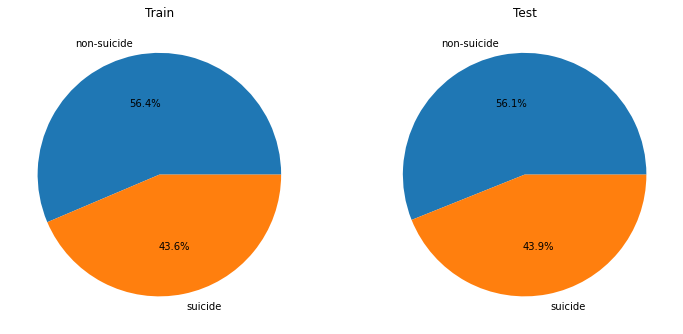

In [109]:
fig, ax = plt.subplots(1, 2, figsize=(12, 12))
ax[0].pie(y_train.value_counts(), labels=y_train.value_counts().index, autopct='%1.1f%%')
ax[0].set_title('Train')
ax[1].pie(y_test.value_counts(), labels=y_test.value_counts().index, autopct='%1.1f%%')
ax[1].set_title('Test')
plt.show()

In [110]:
# nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.union({'4661', 'meeeeeeeeeeee', 'ja', '01457654035', 'reaally', '3624', '3904512441', 'mesooo', 'ان فرع', ''})

{'',
 '01457654035',
 '3624',
 '3904512441',
 '4661',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'ja',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'meeeeeeeeeeee',
 'mesooo',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'on

In [111]:
def tokenize(text):
    tokenizer = nltk.TweetTokenizer()
    return tokenizer.tokenize(text)

In [112]:
# bow = CountVectorizer(tokenizer=tokenize, stop_words=stopwords)
# bow.fit(x_train)
# x_train_bow = bow.fit_transform(x_train)
# x_test_bow = bow.transform(x_test)
# len(bow.get_feature_names())

In [113]:
x_train_bow = pkl.load(open('data/x_train_bow.pkl', 'rb'))
x_test_bow = pkl.load(open('data/x_test_bow.pkl', 'rb'))

In [114]:
tfidf = TfidfVectorizer(tokenizer=tokenize, stop_words=stopwords)
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)
len(tfidf.get_feature_names())

c:\Users\elpin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


145020

In [115]:
pkl.dump(x_train_bow, open('data/x_train_bow.pkl', 'wb'))
pkl.dump(x_test_bow, open('data/x_test_bow.pkl', 'wb'))
pkl.dump(x_train_tfidf, open('data/x_train_tfidf.pkl', 'wb'))
pkl.dump(x_test_tfidf, open('data/x_test_tfidf.pkl', 'wb'))


<h3>Red neuronal usando BoW</h3>

In [116]:
bow_model = MLPClassifier(hidden_layer_sizes=(8,8,8) ,max_iter=3, verbose=True, early_stopping=True)

In [117]:
bow_model.fit(x_train_bow, y_train)

Iteration 1, loss = 0.27829302
Validation score: 0.933572
Iteration 2, loss = 0.13343508
Validation score: 0.938901
Iteration 3, loss = 0.09346699
Validation score: 0.936857


c:\Users\elpin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(early_stopping=True, hidden_layer_sizes=(8, 8, 8), max_iter=3,
              verbose=True)

In [118]:
bow_pred_train = bow_model.predict(x_train_bow)
bow_pred_test = bow_model.predict(bow.transform(x_test))

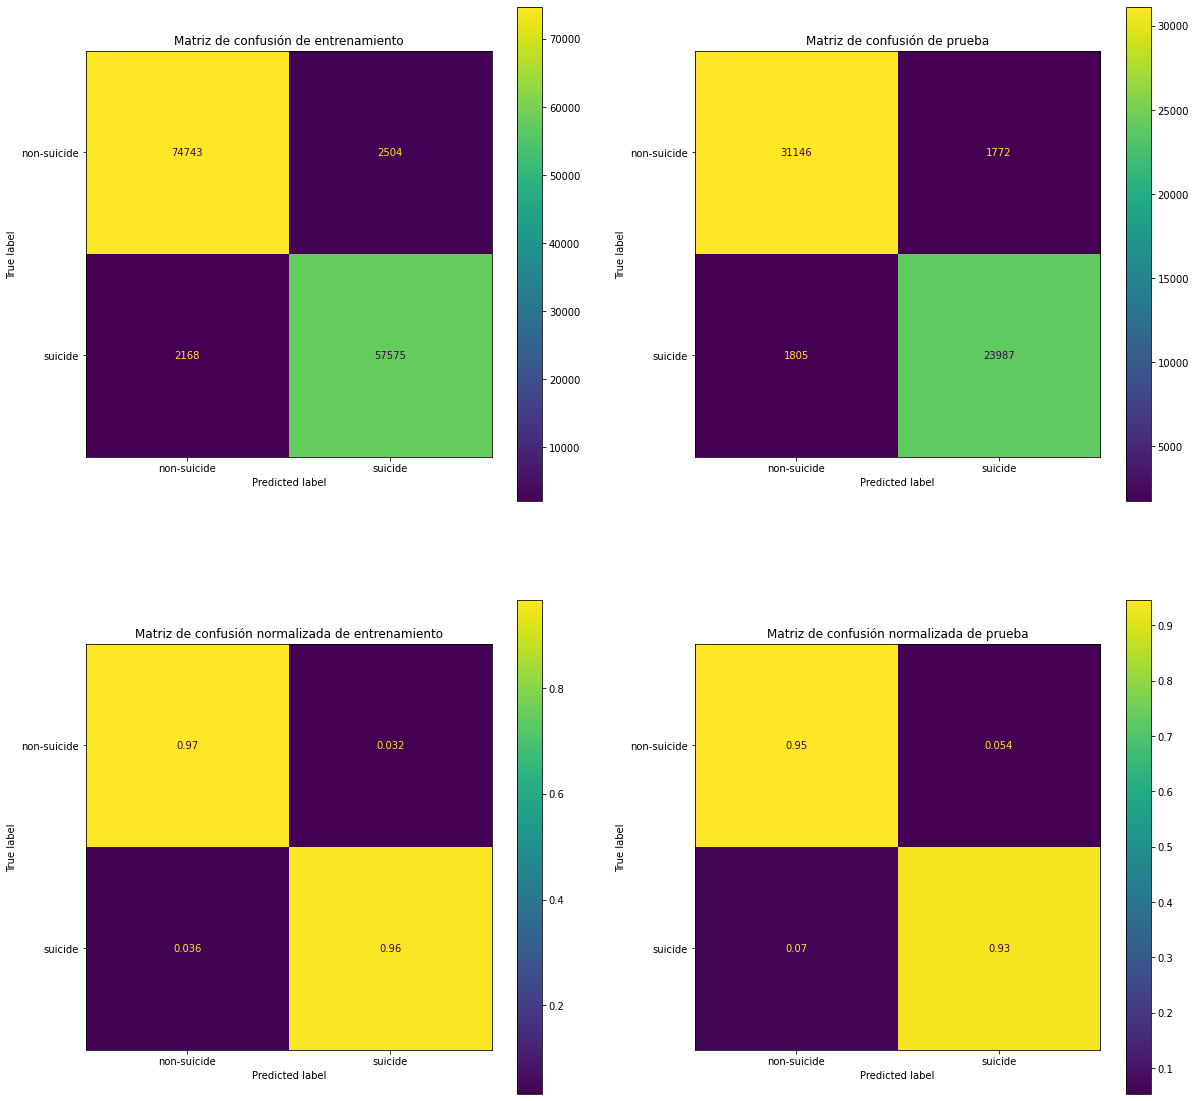

In [119]:
cm_train = confusion_matrix(y_train, bow_pred_train)
cm_test = confusion_matrix(y_test, bow_pred_test)
cm_train_norm = confusion_matrix(y_train, bow_pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, bow_pred_test, normalize='true')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax[0, 0].set_title('Matriz de confusión de entrenamiento')
ax[0, 1].set_title('Matriz de confusión de prueba')
ax[1, 0].set_title('Matriz de confusión normalizada de entrenamiento')
ax[1, 1].set_title('Matriz de confusión normalizada de prueba')
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=bow_model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=bow_model.classes_)
disp_train_norm = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=bow_model.classes_)
disp_test_norm = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=bow_model.classes_)
disp_train.plot(ax=ax[0, 0])
disp_test.plot(ax=ax[0, 1])
disp_train_norm.plot(ax=ax[1, 0])
disp_test_norm.plot(ax=ax[1, 1])
plt.show()

In [120]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score

pd.DataFrame([{'Train': accuracy_score(y_train, bow_pred_train), 'Test': accuracy_score(y_test, bow_pred_test)},
            {'Train': precision_score(y_train, bow_pred_train, average='weighted'), 'Test': precision_score(y_test, bow_pred_test, average='weighted')},
            {'Train': recall_score(y_train, bow_pred_train, average='weighted'), 'Test': recall_score(y_test, bow_pred_test, average='weighted')},
            {'Train': f1_score(y_train, bow_pred_train, average='weighted'), 'Test': f1_score(y_test, bow_pred_test, average='weighted')}],
            index=['Accuracy', 'Precision', 'Recall', 'F1'])

,Train,Test
Accuracy,0.965895,0.939073
Precision,0.965928,0.939066
Recall,0.965895,0.939073
F1,0.965906,0.939069


In [121]:
from datetime import datetime
now = datetime.now()
date = now.date()
time = now.time().strftime("%H-%M-%S")
nombre="NN/BOW_"+str(date)+"_"+str(time)+".pkl"
pkl.dump(bow_model,open(nombre,"wb"))

<h3>Red neuronal usando TF-IDF</h3>

In [122]:
tfidf_model = MLPClassifier(hidden_layer_sizes=(8,8,8) ,max_iter=3, verbose=True, early_stopping=True)

In [123]:
tfidf_model.fit(x_train_tfidf, y_train)

Iteration 1, loss = 0.39085995
Validation score: 0.936930
Iteration 2, loss = 0.14038143
Validation score: 0.937587
Iteration 3, loss = 0.10643135
Validation score: 0.937295


c:\Users\elpin\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (3) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(early_stopping=True, hidden_layer_sizes=(8, 8, 8), max_iter=3,
              verbose=True)

In [124]:
tfidf_pred_train = tfidf_model.predict(x_train_tfidf)
tfidf_pred_test = tfidf_model.predict(tfidf.transform(x_test))

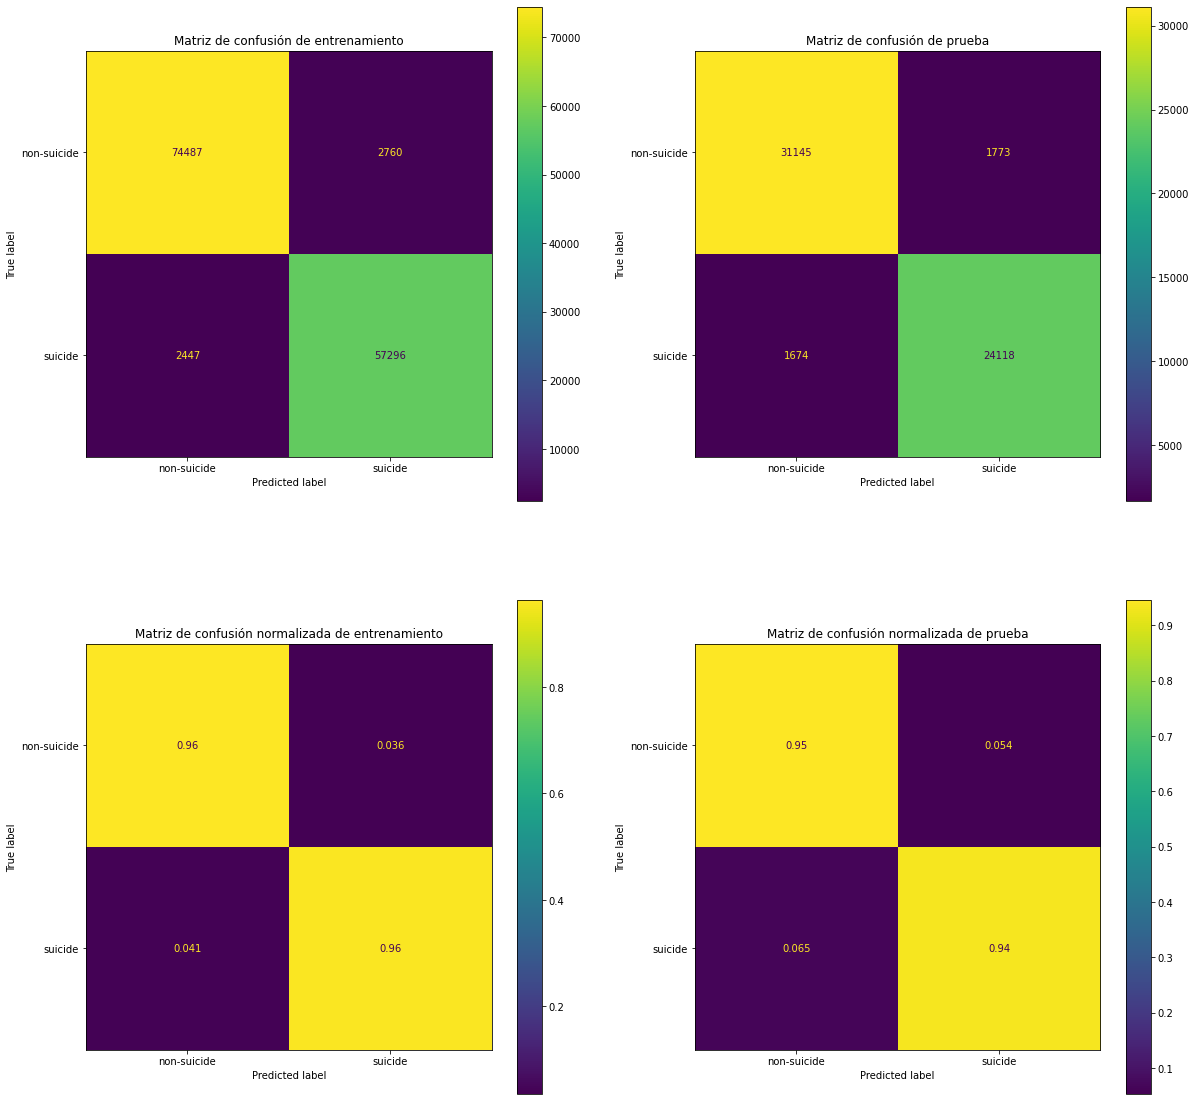

In [125]:
cm_train = confusion_matrix(y_train, tfidf_pred_train)
cm_test = confusion_matrix(y_test, tfidf_pred_test)
cm_train_norm = confusion_matrix(y_train, tfidf_pred_train, normalize='true')
cm_test_norm = confusion_matrix(y_test, tfidf_pred_test, normalize='true')

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))
ax[0, 0].set_title('Matriz de confusión de entrenamiento')
ax[0, 1].set_title('Matriz de confusión de prueba')
ax[1, 0].set_title('Matriz de confusión normalizada de entrenamiento')
ax[1, 1].set_title('Matriz de confusión normalizada de prueba')
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train, display_labels=tfidf_model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=tfidf_model.classes_)
disp_train_norm = ConfusionMatrixDisplay(confusion_matrix=cm_train_norm, display_labels=tfidf_model.classes_)
disp_test_norm = ConfusionMatrixDisplay(confusion_matrix=cm_test_norm, display_labels=tfidf_model.classes_)
disp_train.plot(ax=ax[0, 0])
disp_test.plot(ax=ax[0, 1])
disp_train_norm.plot(ax=ax[1, 0])
disp_test_norm.plot(ax=ax[1, 1])
plt.show()

In [126]:
pd.DataFrame([{'Train': accuracy_score(y_train, tfidf_pred_train), 'Test': accuracy_score(y_test, tfidf_pred_test)},
            {'Train': precision_score(y_train, tfidf_pred_train, average='weighted'), 'Test': precision_score(y_test, tfidf_pred_test, average='weighted')},
            {'Train': recall_score(y_train, tfidf_pred_train, average='weighted'), 'Test': recall_score(y_test, tfidf_pred_test, average='weighted')},
            {'Train': f1_score(y_train, tfidf_pred_train, average='weighted'), 'Test': f1_score(y_test, tfidf_pred_test, average='weighted')}],
            index=['Accuracy', 'Precision', 'Recall', 'F1'])

,Train,Test
Accuracy,0.961990,0.941288
Precision,0.962022,0.941317
Recall,0.961990,0.941288
F1,0.962001,0.941300


In [127]:
now = datetime.now()
date = now.date()
time = now.time().strftime("%H-%M-%S")
nombre="NN/tfidf_"+str(date)+"_"+str(time)+".pkl"
pkl.dump(tfidf_model,open(nombre,"wb"))